In [58]:
import pandas as pd

In [99]:
from gpx_csv_converter import Converter

In [102]:
with open('Evening_Run.gpx', 'r') as myfile:
    data=myfile.read().replace('\n', '')
    gpx_string = data
    Converter(gpx_string, 'EveningRun.csv')

Done!


In [103]:
df = pd.read_csv("EveningRun.csv")

In [104]:
df.tail()

,date,time,latitude,longitude,elevation,heart_rate
739,2018-8-17,3:54:57,37.804416,-122.423939,32.4,141
740,2018-8-17,3:54:58,37.804420,-122.423912,32.4,141
741,2018-8-17,3:55:9,37.804442,-122.423686,32.6,142
742,2018-8-17,3:55:10,37.804443,-122.423679,32.6,141
743,2018-8-17,3:55:12,37.804440,-122.423666,32.4,140


In [105]:
for index, row in df.iterrows():
    times_list = str(row['time']).split(":")
    hours = int(times_list[0])
    minutes = int(times_list[1])
    seconds = int(times_list[2])
    
    total_time = (hours * 3600) + (minutes * 60) + seconds
    df.loc[index, 'total_seconds'] = total_time

In [106]:
df.head()

,date,time,latitude,longitude,elevation,heart_rate,total_seconds
0,2018-8-17,2:52:36,37.804560,-122.423432,38.2,77,10356.0
1,2018-8-17,2:52:37,37.804556,-122.423444,38.4,78,10357.0
2,2018-8-17,2:52:38,37.804550,-122.423466,38.8,79,10358.0
3,2018-8-17,2:52:45,37.804463,-122.423693,37.6,81,10365.0
4,2018-8-17,2:52:47,37.804439,-122.423755,37.8,87,10367.0


In [107]:
df['prev_total_seconds'] = df['total_seconds'].shift(1)
df['prev_lat'] = df['latitude'].shift(1)
df['prev_lon'] = df['longitude'].shift(1)

In [108]:
df = df.iloc[1:]

In [109]:
for index, row in df.iterrows():
    time_difference = row['total_seconds'] - row['prev_total_seconds']
    df.loc[index, 'time_difference'] = time_difference

In [110]:
df.head()

,date,time,latitude,longitude,elevation,heart_rate,total_seconds,prev_total_seconds,prev_lat,prev_lon,time_difference
1,2018-8-17,2:52:37,37.804556,-122.423444,38.4,78,10357.0,10356.0,37.804560,-122.423432,1.0
2,2018-8-17,2:52:38,37.804550,-122.423466,38.8,79,10358.0,10357.0,37.804556,-122.423444,1.0
3,2018-8-17,2:52:45,37.804463,-122.423693,37.6,81,10365.0,10358.0,37.804550,-122.423466,7.0
4,2018-8-17,2:52:47,37.804439,-122.423755,37.8,87,10367.0,10365.0,37.804463,-122.423693,2.0
5,2018-8-17,2:52:48,37.804431,-122.423789,37.6,91,10368.0,10367.0,37.804439,-122.423755,1.0


In [111]:
from haversine import haversine

In [112]:
for index, row in df.iterrows():
    current_loc = (float(row['latitude']), float(row['longitude']))
    prev_loc = (float(row['prev_lat']), float(row['prev_lon']))
    
    distance = haversine(prev_loc, current_loc, miles=False)
    df.loc[index, 'distance'] = distance
    

In [113]:
df.head()

,date,time,latitude,longitude,elevation,heart_rate,total_seconds,prev_total_seconds,prev_lat,prev_lon,time_difference,distance
1,2018-8-17,2:52:37,37.804556,-122.423444,38.4,78,10357.0,10356.0,37.804560,-122.423432,1.0,0.001144
2,2018-8-17,2:52:38,37.804550,-122.423466,38.8,79,10358.0,10357.0,37.804556,-122.423444,1.0,0.002045
3,2018-8-17,2:52:45,37.804463,-122.423693,37.6,81,10365.0,10358.0,37.804550,-122.423466,7.0,0.022166
4,2018-8-17,2:52:47,37.804439,-122.423755,37.8,87,10367.0,10365.0,37.804463,-122.423693,2.0,0.006066
5,2018-8-17,2:52:48,37.804431,-122.423789,37.6,91,10368.0,10367.0,37.804439,-122.423755,1.0,0.003117


In [114]:
for index, row in df.iterrows():
    pace = float(row['distance']) / float(row['time_difference'])
    df.loc[index, 'pace'] = pace

In [115]:
df.head()

,date,time,latitude,longitude,elevation,heart_rate,total_seconds,prev_total_seconds,prev_lat,prev_lon,time_difference,distance,pace
1,2018-8-17,2:52:37,37.804556,-122.423444,38.4,78,10357.0,10356.0,37.804560,-122.423432,1.0,0.001144,0.001144
2,2018-8-17,2:52:38,37.804550,-122.423466,38.8,79,10358.0,10357.0,37.804556,-122.423444,1.0,0.002045,0.002045
3,2018-8-17,2:52:45,37.804463,-122.423693,37.6,81,10365.0,10358.0,37.804550,-122.423466,7.0,0.022166,0.003167
4,2018-8-17,2:52:47,37.804439,-122.423755,37.8,87,10367.0,10365.0,37.804463,-122.423693,2.0,0.006066,0.003033
5,2018-8-17,2:52:48,37.804431,-122.423789,37.6,91,10368.0,10367.0,37.804439,-122.423755,1.0,0.003117,0.003117


In [116]:
df['pace'] = df['pace'] * 1000

In [117]:
df.head()

,date,time,latitude,longitude,elevation,heart_rate,total_seconds,prev_total_seconds,prev_lat,prev_lon,time_difference,distance,pace
1,2018-8-17,2:52:37,37.804556,-122.423444,38.4,78,10357.0,10356.0,37.804560,-122.423432,1.0,0.001144,1.144252
2,2018-8-17,2:52:38,37.804550,-122.423466,38.8,79,10358.0,10357.0,37.804556,-122.423444,1.0,0.002045,2.044734
3,2018-8-17,2:52:45,37.804463,-122.423693,37.6,81,10365.0,10358.0,37.804550,-122.423466,7.0,0.022166,3.166534
4,2018-8-17,2:52:47,37.804439,-122.423755,37.8,87,10367.0,10365.0,37.804463,-122.423693,2.0,0.006066,3.032837
5,2018-8-17,2:52:48,37.804431,-122.423789,37.6,91,10368.0,10367.0,37.804439,-122.423755,1.0,0.003117,3.116745


In [118]:
import matplotlib.pyplot as plt

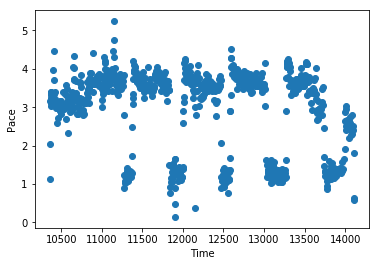

In [119]:
X = df['total_seconds']
y = df['pace']

plt.xlabel('Time')
plt.ylabel('Pace')

plt.scatter(X,y)
plt.show()

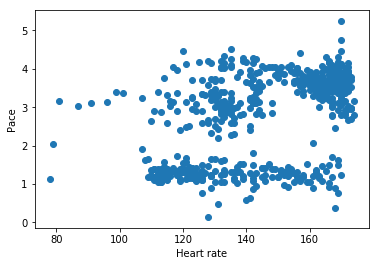

In [120]:
X = df['heart_rate']
y = df['pace']

plt.xlabel('Heart rate')
plt.ylabel('Pace')

plt.scatter(X,y)
plt.show()

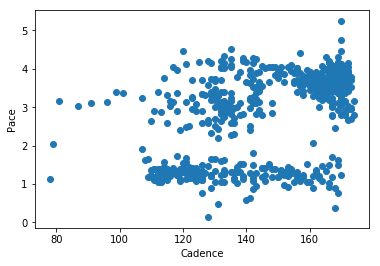

In [122]:
X = df['heart_rate']
y = df['pace']

plt.xlabel('Cadence')
plt.ylabel('Pace')

plt.scatter(X,y)
plt.show()

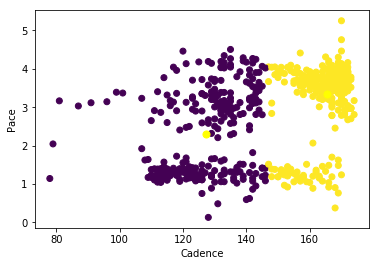

In [123]:
from sklearn.cluster import KMeans
import numpy as np

data = np.column_stack((X, y))
k_means = KMeans(n_clusters=2)
k_means.fit(data)  
plt.xlabel('Cadence')
plt.ylabel('Pace')
plt.scatter(data[:, 0], data[:, 1],c = k_means.labels_)
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s = 50, c = 'yellow')
plt.show()

In [124]:
# Returns 0 or 1
# 1 = Rest Period
# 0 = High intensity period
def make_prediction(cad, pace):
    return k_means.predict(np.column_stack((cad, pace)).reshape(1, -1))[0]

In [97]:
make_prediction(80, 5)

0